In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, GRU, LSTM, Dense
from tensorflow.keras.preprocessing import sequence

In [2]:
def create(model_name):
    m_name=eval(model_name)
    model=Sequential([
        Embedding(max_words, 64, input_length=max_length),
        m_name(64),Dense(1, activation='sigmoid')],name=model_name)
    return model

In [3]:
def m_compile(model,xtr,ytr):
    size=200
    e=5
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(xtr, ytr, batch_size=size, epochs=e, validation_split=0.2)
    return history

In [4]:
max_words = 10000
(xtr,ytr),(xt, yt) = imdb.load_data(num_words=max_words)
max_length = 250
xtr = sequence.pad_sequences(xtr, maxlen=max_length)
xt = sequence.pad_sequences(xt, maxlen=max_length)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
names=['SimpleRNN','GRU','LSTM']
models=[]
for i in names:
    m=create(i)
    models.append(m)

In [6]:
hist=[]
for i in models:
    x=m_compile(i,xtr,ytr)
    hist.append(x)

Epoch 1/5
100/100 [==============================] - 10s 87ms/step - loss: 0.5693 - accuracy: 0.6945 - val_loss: 0.3985 - val_accuracy: 0.8270
Epoch 2/5
100/100 [==============================] - 8s 78ms/step - loss: 0.3195 - accuracy: 0.8697 - val_loss: 0.3631 - val_accuracy: 0.8508
Epoch 3/5
100/100 [==============================] - 9s 86ms/step - loss: 0.2198 - accuracy: 0.9163 - val_loss: 0.3687 - val_accuracy: 0.8482
Epoch 4/5
100/100 [==============================] - 8s 85ms/step - loss: 0.1269 - accuracy: 0.9568 - val_loss: 0.4183 - val_accuracy: 0.8336
Epoch 5/5
100/100 [==============================] - 8s 85ms/step - loss: 0.0690 - accuracy: 0.9808 - val_loss: 0.4624 - val_accuracy: 0.8486
Epoch 1/5
100/100 [==============================] - 28s 268ms/step - loss: 0.5266 - accuracy: 0.7139 - val_loss: 0.3473 - val_accuracy: 0.8508
Epoch 2/5
100/100 [==============================] - 26s 258ms/step - loss: 0.2556 - accuracy: 0.8974 - val_loss: 0.3199 - val_accuracy: 0.8632
E

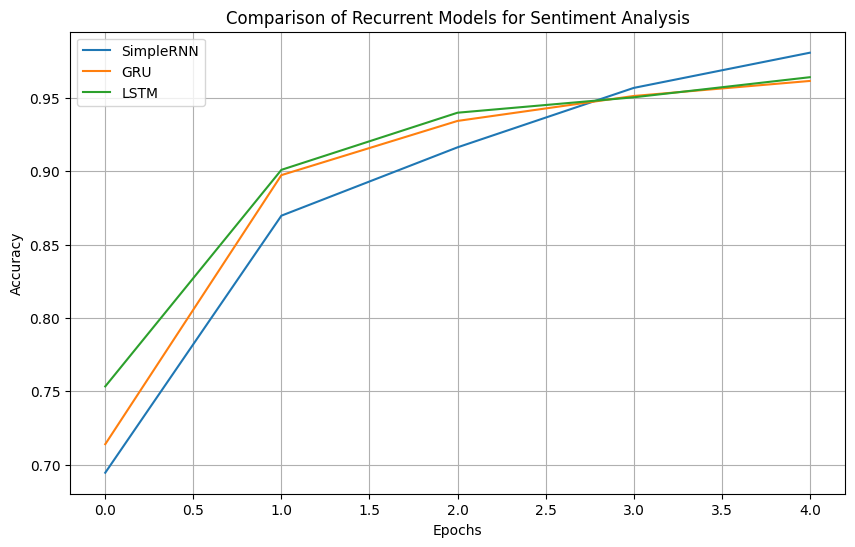

In [7]:
plt.figure(figsize=(10, 6))
for i, history in enumerate(hist):
    plt.plot(history.history['accuracy'], label=names[i])

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of Recurrent Models for Sentiment Analysis')
plt.legend()
plt.grid(True)
plt.show()